In [14]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

sns.set(rc={"figure.figsize": (6, 6)}) 

np.random.seed(sum(map(ord, "palettes")))

## 通过 color_palette() 创建调色板

color_palette()允许任意的seaborn调色板或matplotlib的颜色映射（除了jet，你应该完全不使用它）。它还可以使用任何有效的matplotlib格式指定的颜色列表(RGB元组、十六进制颜色代码或HTML颜色名称)。返回值总是一个RGB元组的列表。

最后，直接调用没有传入参数的color_palette()将返回默认的颜色循环。

对应的函数set_palette()接受相同的参数，并为所有图设置默认的颜色循环。你也可以在with块中使用color_palette()来实现临时的更改调色板配置（下面有详细例子）。

通常在不知道数据的具体特征的情况下不可能知道什么类型的调色板或颜色映射对于一组数据来说是最好的。因此，我们将用三种不同类型的调色板：分类色板、连续色板和离散色板，来区分和使用color_palette()函数。

## 分类色板

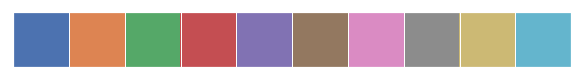

In [6]:
current_palette = sns.color_palette() 

sns.palplot(current_palette)

默认颜色主题共有六种不同的变化分别是：deep, muted, pastel, bright, dark, 和 colorblind。类似下面的方式直接传入即可。

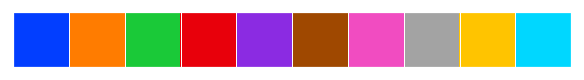

In [10]:
current_palette = sns.color_palette("bright") # 直接传入对应的参数即可变化 {deep, muted, pastel, bright, dark, colorblind}

sns.palplot(current_palette)

### 使用圆形颜色系统

当你有六个以上的分类要区分时，最简单的方法就是在一个圆形的颜色空间中画出均匀间隔的颜色(这样的色调会保持亮度和饱和度不变)。这是大多数的当他们需要使用比当前默认颜色循环中设置的颜色更多时的默认方案。

最常用的方法是使用hls的颜色空间，这是RGB值的一个简单转换。

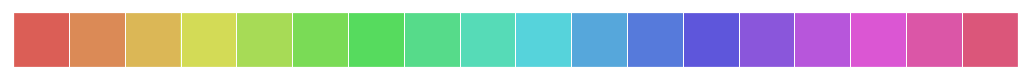

In [13]:
sns.palplot(sns.color_palette("hls", 18))

也可以使用hls_palette()函数来控制颜色的亮度和饱和。

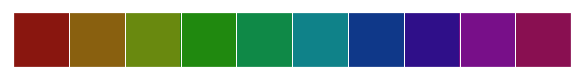

In [16]:
# l-亮度 lightness / s-饱和 saturation

sns.palplot(sns.hls_palette(10, l=0.3, s=0.8)) 

由于人类视觉系统的工作方式，会导致在RGB度量上强度一致的颜色在视觉中并不平衡。比如，我们黄色和绿色是相对较亮的颜色，而蓝色则相对较暗，使得这可能会成为与hls系统一致的一个问题。

为了解决这一问题，seaborn为husl系统提供了一个接口，这也使得选择均匀间隔的色彩变得更加容易，同时保持亮度和饱和度更加一致。

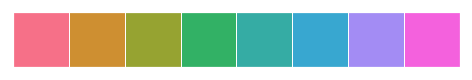

In [17]:
sns.palplot(sns.color_palette("husl", 8))

### 使用分类颜色调色板

另一种视觉上令人愉悦的分类调色板来自于Color Brewer工具(它也有连续调色板和离散调色板，我们将在下面的图中看到)。这些也存在于matplotlib颜色映射中，但是它们没有得到适当的处理。在这里，当你要求一个定性颜色的调色板时，你总是会得到离散的颜色，但这意味着在某一点它们会开始循环。

Color Brewer工具的一个很好的特点是，它提供了一些关于调色板是色盲安全的指导。有各种各样的适合色盲的颜色，但是最常见的变异导致很难区分红色和绿色。一般来说，避免使用红色和绿色来表示颜色以区分元素是一个不错的主意。

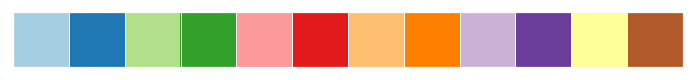

In [18]:
sns.palplot(sns.color_palette("Paired"))

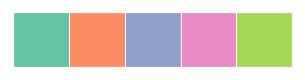

In [19]:
sns.palplot(sns.color_palette("Set2", 5))

### choose_colorbrewer_palette()

为了帮助您从Color Brewer工具中选择调色板，这里有choose_colorbrewer_palette()函数。这个函数必须在IPython notebook中使用，它将启动一个交互式小部件，让您浏览各种选项并调整参数。

当然，您可能只想使用一组您特别喜欢的颜色。因为color_palette()接受一个颜色列表，这很容易做到。

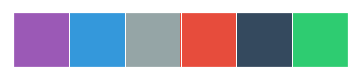

In [20]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"] 

sns.palplot(sns.color_palette(flatui))

In [24]:
sns.choose_colorbrewer_palette("sequential") 

# data_type: {‘sequential’, ‘diverging’, ‘qualitative’}

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

[(0.9575547866205305, 0.9575547866205305, 0.9575547866205305),
 (0.9012072279892349, 0.9012072279892349, 0.9012072279892349),
 (0.8328950403690888, 0.8328950403690888, 0.8328950403690888),
 (0.7502191464821223, 0.7502191464821223, 0.7502191464821223),
 (0.6434140715109573, 0.6434140715109573, 0.6434140715109573),
 (0.5387158785082661, 0.5387158785082661, 0.5387158785082661),
 (0.440322952710496, 0.440322952710496, 0.440322952710496),
 (0.342883506343714, 0.342883506343714, 0.342883506343714),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]

In [25]:
sns.choose_colorbrewer_palette("sequential", as_cmap=True) 

# as_cmap参数 用来更改显示的颜色范围是离散的还是连续的

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

### 使用xkcd颜色来命名颜色

xkcd包含了一套众包努力的针对随机RGB色的命名。产生了954个可以随时通过xdcd_rgb字典中调用的命名颜色。

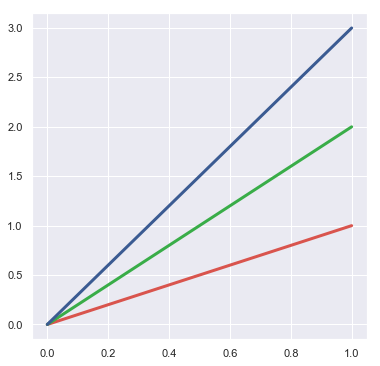

In [26]:
plt.plot([0, 1], [0, 1], sns.xkcd_rgb["pale red"], lw=3) 

plt.plot([0, 1], [0, 2], sns.xkcd_rgb["medium green"], lw=3) 

plt.plot([0, 1], [0, 3], sns.xkcd_rgb["denim blue"], lw=3)

如果你想花一些时间挑选颜色，或许这种交互式的可视化（官方链接失效）是非常有帮助的。除了将单一颜色从xkcd_rgb字典中取出，也可以通过名称列表传入xkcd_palette()函数中取得颜色组。

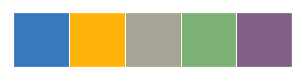

In [27]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"] 

sns.palplot(sns.xkcd_palette(colors))

## 连续色板

调色板中第二大类称为“顺序”。这种颜色映射对应的是从相对低价值（无意义）数据到高价值（有意义）的数据范围。虽然有时候你会需要一个连续的离散颜色调色板，用他们像kdeplot()或者corrplot()功能映射更加常见（以及可能类似的matplotlib功能）。

非常可能的是见到jet色彩映射（或其他采用调色板）在这种情况下使用，因为色彩范围提供有关数据的附加信息。然而，打的色调变化中往往会引入不连续性中不存在的数据和视觉系统不能自然的通过“彩虹色”定量产生“高”、“低”之分。其结果是，这样的可视化更像是一个谜题，模糊了数据中的信息而并非揭示这种信息。事实上，jet调色板可能非常糟糕，因为最亮的颜色，黄色和青色用于显示中间数值，这就导致强调了一些没有意义的数据而忽视了端点的数据。

所以对于连续的数据，最好是使用那些在色调上相对细微变化的调色板，同时在亮度和饱和度上有很大的变化。这种方法将自然地吸引数据中相对重要的部分

Color Brewer的字典中就有一组很好的调色板。它们是以在调色板中的主导颜色(或颜色)命名的。

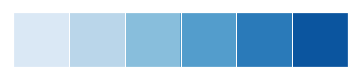

In [28]:
sns.palplot(sns.color_palette("Blues"))

就像在matplotlib中一样，如果您想要翻转渐变，您可以在面板名称中添加一个_r后缀。

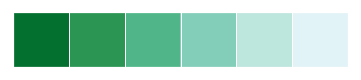

In [29]:
sns.palplot(sns.color_palette("BuGn_r"))

seaborn还增加了一个允许创建没有动态范围的"dark"面板。如果你想按顺序画线或点，这可能是有用的，因为颜色鲜艳的线可能很难区分。

类似的，这种暗处理的颜色，需要在面板名称中添加一个_d后缀

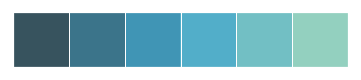

In [30]:
sns.palplot(sns.color_palette("GnBu_d"))

牢记，你可能想使用choose_colorbrewer_palette()函数取绘制各种不同的选项。如果你想返回一个变量当做颜色映射传入seaborn或matplotlib的函数中，可以设置as_cmap参数为True。

### cubehelix_palette() 函数的连续调色板

cubehelix调色板系统具有线性增加或降低亮度和色调变化顺序的调色板。这意味着在你的映射信息会在保存为黑色和白色（为印刷）时或被一个色盲的人浏览时可以得以保留。

Matplotlib拥有一个默认的内置cubehelix版本可供创建:

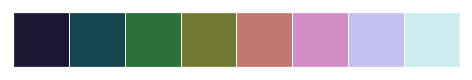

In [33]:
sns.palplot(sns.color_palette("cubehelix", 8))

seaborn为cubehelix系统添加一个接口使得其可以在各种变化中都保持良好的亮度线性梯度。

通过seaborn的cubehelix_palette()函数返回的调色板与matplotlib默认值稍有所不同，它不会在色轮周围旋转或覆盖更广的强度范围。

seaborn还改变了排序使得更重要的值显得更暗：

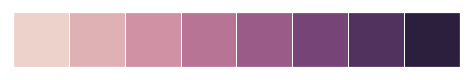

In [34]:
sns.palplot(sns.cubehelix_palette(8))

其他cubehelix_palette()的参数主要调整色板的视觉。

两个重要的选择是：start(值的范围为03）和rot，还有rot的次数（-11之间的任意值）

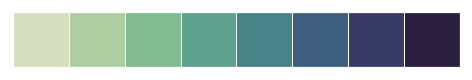

In [36]:
sns.palplot(sns.cubehelix_palette(8, start=.5, rot=-0.75))

默认情况下你只会得到一些与seaborn调色板相似的颜色的列表，但你也可以让调色板返回一个可以用as_cmap=True传入seaborn或matplotlib函数的颜色映射对象

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


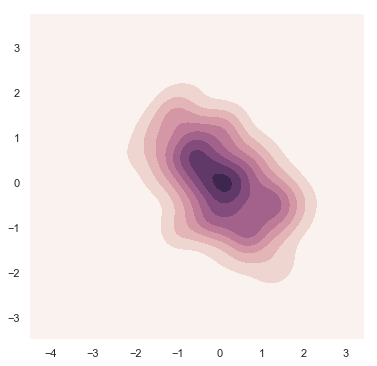

In [37]:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T 

cmap = sns.cubehelix_palette(light=1, as_cmap=True) 

sns.kdeplot(x, y, cmap=cmap, shade=True)

类似的，也可以在notebook中使用choose_cubehelix_palette()函数启动一个互助程序来帮助选择更适合的调色板或颜色映射。如果想让函数返回一个类似hexbin的颜色映射而非一个列表则需要传入as_cmap=True。

### light_palette() 和 dark_palette() 调用定制连续调色板

这里还有一个更简单的连续调色板的使用方式，就是调用light_palette() 和dark_palette()，这与一个单一颜色和种子产生的从亮到暗的饱和度的调色板。这些函数还伴有choose_light_palette() and choose_dark_palette()函数，这些函数启动了交互式小部件来创建这些调色板。

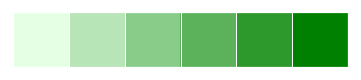

In [38]:
sns.palplot(sns.light_palette("green"))

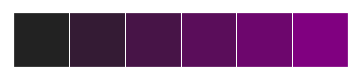

In [39]:
sns.palplot(sns.dark_palette("purple"))

这些调色板结果也可以颠倒

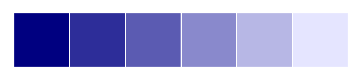

In [40]:
sns.palplot(sns.light_palette("navy", reverse=True))

当然也可以创建一个颜色映射对象取代颜色列表

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


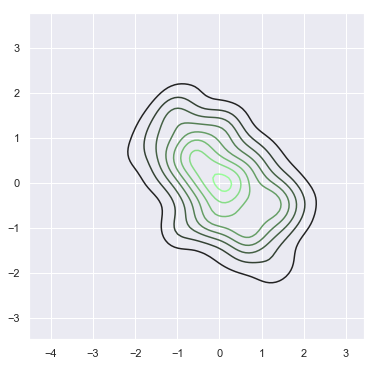

In [41]:
pal = sns.dark_palette("palegreen", as_cmap=True) 

sns.kdeplot(x, y, cmap=pal)

默认情况下，任何有效的matplotlib颜色可以传递给input参数。也可以在hls或husl空间中提供默认的rgb元组，您还可以使用任何有效的xkcd颜色的种子。

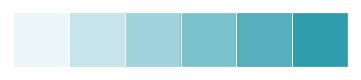

In [42]:
sns.palplot(sns.light_palette((210, 90, 60), input="husl"))

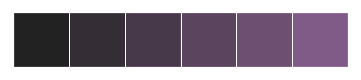

In [43]:
sns.palplot(sns.dark_palette("muted purple", input="xkcd"))

需要注意的是，为默认的input空间提供交互的组件是husl，这与函数自身默认的并不同，但这在背景下却是更有用的。

## 离散色板

调色板中的第三类被称为“离散”。用于可能无论大的低的值和大的高的值都非常重要的数据。数据中通常有一个定义良好的中点。例如，如果你正在绘制温度变化从基线值，最好使用不同色图显示相对降低和相对增加面积的地区。

选择离散色板的规则类似于顺序色板，除了你想满足一个强调的颜色中点以及用不同起始颜色的两个相对微妙的变化。同样重要的是，起始值的亮度和饱和度是相同的。

同样重要的是要强调，应该避免使用红色和绿色，因为大量的潜在观众将无法分辨它们。

你不应该感到惊讶的是，Color Brewer颜色字典里拥有一套精心挑选的离散颜色映射:

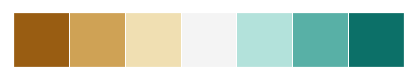

In [44]:
sns.palplot(sns.color_palette("BrBG", 7))

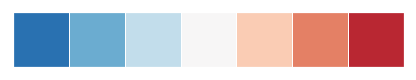

In [45]:
sns.palplot(sns.color_palette("RdBu_r", 7))

另一个在matplotlib中建立的明智的选择是coolwarm面板。请注意，这个颜色映射在中间值和极端之间并没有太大的对比。

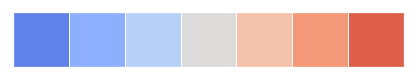

In [46]:
sns.palplot(sns.color_palette("coolwarm", 7))

### diverging_palette() 使用定制离散色板

你也可以使用海运功能diverging_palette()为离散的数据创建一个定制的颜色映射。（当然也有一个类似配套的互动工具：choose_diverging_palette()）。该函数使用husl颜色系统的离散色板。你需随意传递两种颜色，并设定明度和饱和度的端点。函数将使用husl的端点值及由此产生的中间值进行均衡。

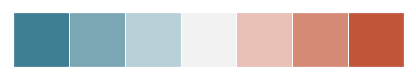

In [47]:
sns.palplot(sns.diverging_palette(220, 20, n=7))

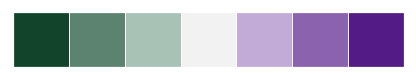

In [48]:
sns.palplot(sns.diverging_palette(145, 280, s=85, l=25, n=7))

sep参数 控制面板中间区域的两个渐变的宽度。

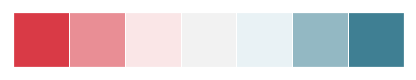

In [49]:
sns.palplot(sns.diverging_palette(10, 220, sep=80, n=7))

也可以用中间的色调来选择调色，而不是用亮度

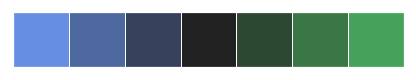

In [50]:
sns.palplot(sns.diverging_palette(255, 133, l=60, n=7, center="dark"))

## set_palette() 更改色变的默认值

color_palette() 函数有一个名为set_palette()的配套。它们之间的关系类似于在美学教程中涉及的aesthetics tutorial. set_palette()。set_palette()接受与color_palette()相同的参数，但是它会更改默认的matplotlib参数，以便成为所有的调色板配置。

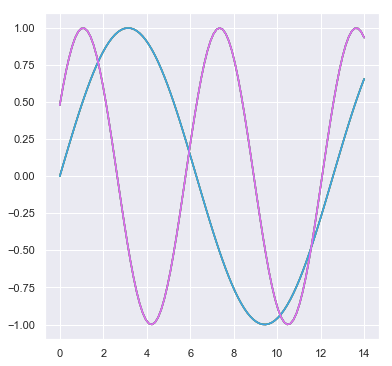

In [65]:
def sinplot(flip=1):

    x = np.linspace(0, 14, 100)

    for i in range(1, 7):
        plt.plot(x, np.sin(0.5 * x))
        plt.plot(x, np.sin(x + 0.5))

sns.set_palette("husl")

sinplot()

color_palette()函数也可以在一个with块中使用，以达到临时更改调色板的目的

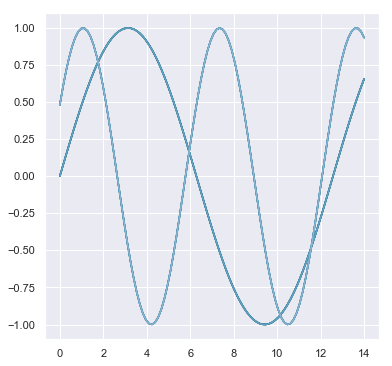

In [66]:
with sns.color_palette("PuBuGn_d"):

    sinplot()

## 简单常用色彩总结

分类：hls husl Paired Set1~Set3（色调不同）

连续：Blues[蓝s，颜色+s] BuGn[蓝绿] cubehelix（同色系渐变）

离散：BrBG[棕绿] RdBu[红蓝] coolwarm[冷暖]（双色对称）